## 파이썬 면접대비 복습
 - https://wikidocs.net/4308  Regular Expression
 - https://wikidocs.net/31766  자연어 처리
 - http://seaborn.pydata.org/index.html seaborn
 - http://seaborn.pydata.org/tutorial.html  seaborn tutorial

In [28]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import konlpy
%matplotlib inline

## 1. pandas
 - Series : 1차원 배열 값(value)에 각 값에 대응되는 index 부여할 수 있는 구조
 - DataFrame : 행, 열, 인덱스
 - Pannel

In [12]:
# Series
sr = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
print(sr)
print(sr.values)
print(sr.index)

a    1
b    2
c    3
d    4
dtype: int64
[1 2 3 4]
Index(['a', 'b', 'c', 'd'], dtype='object')


## 2. Numpy
; 수치 데이터를 다루는 파이썬 패키지
 - ndarray 사용하여 선형대수계산(벡터, 행렬)

주요모듈
1. np.array() # 리스트, 튜플, 배열로 부터 ndarray를 생성
2. np.asarray() # 기존의 array로 부터 ndarray를 생성
3. np.arange() # range와 비슷
4. np.linspace(start, end, num) # [start, end] 균일한 간격으로 num개 생성
5. np.logspace(start, end, num) # [start, end] log scale 간격으로 num개 생성

In [13]:
a = np.array([1, 2, 3, 4, 5])
print(a)
print(type(a))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [16]:
# 2차원 배열 생성
b = np.array([[1, 2, 3], [4, 5, 6]])  # array에는 배열만 들어감
print(b)
print(type(b))
print(b.ndim) #차원 출력
print(b.shape) #크기 출력

[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
2
(2, 3)


In [17]:
np.zeros((2,3))  # 모든값이 0dls 2x3 배열 생성

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
np.ones((2,3))   # 모든값이 1인 배열 생성

array([[1., 1., 1.],
       [1., 1., 1.]])

In [19]:
np.full((2,2), 7)  # 모든 값이 특정 상수인 배열 생성

array([[7, 7],
       [7, 7]])

In [20]:
np.eye(3)  # 대각행렬 3x3 생성

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
np.random.random((2,2))  # 임의 배열

array([[0.58757706, 0.33097047],
       [0.1425274 , 0.4076087 ]])

In [25]:
# np.arrange() : 지정해준 범위에 대한 배열 생성
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [27]:
# reshape()
np.array(np.arange(30)).reshape(5,6)
# 30까지 배열 생성 후 5x6배열로 변환

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

## 3. Matplotlib
: 시각화 패키지


%matplotlib inline

import matplotlib.pyplot as plt

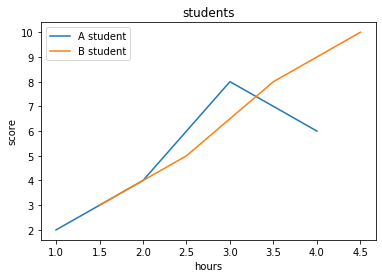

In [29]:
plt.title('students')
plt.plot([1,2,3,4],[2,4,8,6])
plt.plot([1.5,2.5,3.5,4.5],[3,5,8,10]) #라인 새로 추가
plt.xlabel('hours')
plt.ylabel('score')
plt.legend(['A student', 'B student']) #범례 삽입
plt.show()

## 머신러닝 워크플로우
1. 수집 : 말뭉치, 코퍼스(corpus) = 특정 도메인으로부터 수집된 텍스트 집합
2. 점검 및 탐색 : EDA
3. 전처리 및 정제 : 토큰화, 정제, 정규화, 불용어 제거
4. 모델링 및 훈련
5. 평가
6. 배포

## konlpy 
 - 형태소(morpheme) : 작은 말의 단위
 - 정제/정규화 : 노이즈데이터(특수문자, 불필요 단어) 제거 / 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어 준다.
 - 토큰화 : 코퍼스에서 용도에 맞게 토큰을 분류하는 작업.
 - 표제어 추출(Lemmatization) : 기본 사전형 단어
 - 어간 추출(Stemming) : Lemmatization보다 섬세하지 x 없는 단어가 나올 수 있음
 - 불용어 처리(stop words)

In [30]:
# okt = Twitter
from konlpy.tag import Okt

okt=Okt()  
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [31]:
# 품사 태깅
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [32]:
# 명사 추출
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']


In [33]:
from konlpy.tag import Kkma  

kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [34]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [35]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']
